# Final Project 

## Question 6: If Yelpers write both reviews and tips for a business, which do they write first (what is the distribution as to what comes first).
    
Essentially, the question wants to find out the distribution whether people write reviews first or tips first for a business. In order to answer this question, we will use the data from YelpOpen Dataset and Dataset challenge, Round 10. In specific, we will use the reviews dataset and tips databset to answer this question.
     
Source of data is using the Yelp Open Dataset and Dataset challenge Round 10. URL address for downloading the dataset is https://engineeringblog.yelp.com/2017/08/yelp-open-dataset-and-dataset-challenge-round-10.html
     
     

________________

# Insert the credentials from Spark and import necessary packages

In [1]:

import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': 'da5f396ce9f54c11b5762d31cd2bf53a',
    'region': 'dallas',
    'user_id': '9d16cef2faac4c06bb8979a5edc36486',
    'username': 'member_79b4fd6b8db582179a64b47885d5462be1245f1b',
    'password': 'dYIx(V3Pg,1HfE7N'
}

configuration_name = 'os_e2b9e2b48c264343bcf2aeda6e70f6a1_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.


# Getting the needed data files and loading into the notebook for calculation

The following steps are loading needed data into the notebook for calculation and answering our question. After the file loaded into the notebook, we will make a look at the total row of data in that specific file by calling the count method, which will return the number of row in the file. 
__________


## Load review data file and count total reviews in the file

In order to answer the question from the Yelp dataset, we need to import needed data that will be used to answer the question.

Since we have the entire dataset in Spark, we will need to import the data from Object Storage.

First dataset we want to load is the review data from the Yelp dataset. We insert a sparksession data frame to load the review.json file, which contains all the related data about reviews for this challenge, from Yelp dataset into the notebook and create a new data frame for further use.

The reason we are loading the review data is because we want to use the count() method to take a look the total number of reviews in the data frame and get more ideas to answer the question.

Lastly, we create a temporary view called yelp_review from the data frame for the following SQL queries.


In [2]:
path_review = bmos.url('Fall2017', 'review.json.gz')
df_review = spark.read.json(path_review)
print "review count: ", df_review.count()

df_review.createOrReplaceTempView("yelp_review")

review count:  4736897


## Load tip data file into the notebook and count total tips in the file

The second dataset we want to load to the notebook is the tip dataset. Since our question is asking to find a distribution for reviews and tips from a user to a business. It is obvious to load the tip dataset after review dataset.

Same as loading review dataset, we insert a sparksession data frame from the Object Storage and load the tip.json file, which contains all the related data abouttips for this challenge, from Yelp dataset into the notebook and create a data frame for further use.

After the data frame is created for tips dataset, we want to use the count() method to take a look the total number of tips in the data frame. The purpose to use the count() method is same as using the count() method for review data. We would like to know the number of tips in the data frame for further answer the question.

Lastly, we create a temporary view called yelp_tip from the data frame for the following SQL queries.

In [3]:
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.
path_tip = bmos.url('Fall2017', 'tip.json.gz')
df_tip = spark.read.json(path_tip)
print "tip count: ", df_tip.count()

df_tip.createOrReplaceTempView("yelp_tip")

tip count:  1028802


## Load business data file and count total businesses in the file

After the review dataset and tip dataset are loaded to the notebook. We want to oad the business.json file, which contains all the related data about business in Yelp for this challenge, from Yelp dataset into the notebook and create a data frame to retrieve the data.

The reason we load the business file is to use when we want to find out the differences in distribution of a user either write reivew or tips first by different categories.

After we have successfully loaded the business json file, we want to use the count() method to take a look the total number of businesses in the data frame.

Lastly, we create a temporary view called yelp_business from the data frame for the following SQL queries.

In [4]:

# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.
path_business = bmos.url('Fall2017', 'business.json.gz')
df_business = spark.read.json(path_business)
print "business count: ", df_business.count()

df_business.createOrReplaceTempView("yelp_business")

business count:  156639


## Find the earliest date for the first tip in tip file and exclude reviews before that date

Tip functionality was added to Yelp later than review. We don't want to compare the reviews before tip was introduced because those reviews would always be written earlier. We want to find out the first tip in the tip file and use its date to exclude the reviews which were written prior to that date.  

In [5]:
spark.sql(""" 
SELECT MIN(date)
FROM yelp_tip
""").show(5, truncate=False)

+----------+
|min(date) |
+----------+
|2009-04-15|
+----------+



# Next Step: examining the data

After all the needed data have inserted into the notebool, we want to profile, or examining these data. 

Because not everything in our data are useful and may not able to use immediately to answer our question, we want to extract the data that are only helpful to answer our question by setting some condition. For example, our question involved reviews and tips user have wrote for a business in Yelp. User who have no both review or tip to a same business will be excluded. It will reduce the size of our data and speed up the process for the calculation.

Another reason for the profiling is to make the result accurate. A user can write many tips but one review. If we did not profile and extract the earliest tip, all the tips will compare with the reviews; thus, the result is inaccurate.

Profiling the data will reduce the size of each dataset and make the result accurate.

________________

## Extracting the needed fields and the matched data on yelp_tip table

After we successfully inserted the necessary data from the Yelp dataset, it is time that we use SQL query to profile the data and seek the answer for our question. 

In the following cell, we will create a data frame called df_tipdate and retrieve the data from the yelp_tip temporary view which created earlier with SQL query. 

In the SQL query, we use the MIN function to get the earliest tip. Due to the fact that Yelpers can write as many tips as they want, and we only want to get the first tip and compare with the review for which Yelpers can only write one review for each business. After getting the ealiest tip date, we group these results by user id and business id, and we give it the descending order by the tip date.

After the data frame is set by the SQL queries, we use the count() method to display the total number of result, and we create a temporary view for the following SQL queries. Lastly, we display a sample of the result and check if the results match our expectation. 

In [ ]:
df_tipdate = spark.sql(""" 
SELECT user_id, business_id, MIN(date) AS tip_date
FROM yelp_tip
GROUP BY user_id, business_id
ORDER BY tip_date ASC
""")
print "total: ", df_tipdate.count() 
df_tipdate.show(5, truncate=False)

df_tipdate.createOrReplaceTempView("tipdate")

total:  859020
+----------------------+----------------------+----------+
|user_id               |business_id           |tip_date  |
+----------------------+----------------------+----------+
|13xeC5yKJO4BDyQOI3xxDQ|v2-3bnrCOjEdkJx9oQ012w|2009-04-15|
|2ZZNOoMQ7WFvFoxDUFw1wg|xcmmTXhuMx2fZF2Bt69F4w|2009-04-15|
|QoU-t8Cry9s7gG8G93UlwA|WBt2pa7k_K2LKW2OJuXG9Q|2009-04-16|
|g5QmiV9pO2xUBGkNMYzpvQ|J-dCfiKbf0irFtly8Q0ncQ|2009-04-16|
|6en-a9f2a3zLkFsrazvyNA|6Li3eGHOHaqfR9E8oaI1yg|2009-04-16|
+----------------------+----------------------+----------+
only showing top 5 rows



##  Extracting the needed fields and the matched data on yelp_review table

In the last cell, we profiled our tip data and get the expected data we wanted for tip data. In the following cell, we will do the similar thing to profile the review data.

In the following cell, we will create a data frame called df_reviewdate and retrieve the data from the yelp_review temporary view which created earlier with SQL query. 

Similar to profiling yelp_tip table, we created a new data frame called df_reviewdate for containing the expected data we want from profiling the yelp_review table by using SQL query. We select the needed fields in yelp_review. In particular, we use MIN function to get the earliest date for the review. In policy, Yelpers can only write one review for each business. Later, we group the user id, business id as same as the profiling the yelp_tip table and decending order on the review date. 

After the data frame is set by the SQL queries, we use the count() method to display the total number of result, and we create a temporary view for the following SQL queries. Lastly, we display a sample of the result and check if the results match our expectation. 


Extract only Review after the date 2009-04-15 when was the date that the earliest tip was written.

Order by ASC and result OKAY

In [15]:
df_reviewdate = spark.sql(""" 
SELECT user_id, business_id, MIN(date) AS review_date
FROM yelp_review
WHERE date >= "2009-04-15"
GROUP BY user_id, business_id
ORDER BY review_date ASC
""")

print "total: ", df_reviewdate.count() 
df_reviewdate.show(5, truncate=False)

df_reviewdate.createOrReplaceTempView("reviewdate")

total:  4620115
+----------------------+----------------------+-----------+
|user_id               |business_id           |review_date|
+----------------------+----------------------+-----------+
|045lA8joqI1vPm0wLgZPKw|5diHqpk_JSC4p8tIo4APow|2009-04-15 |
|3VOwp7BxuTYlfKREXvUZxw|0zTLMQOZhiCp9GFtegiFsw|2009-04-15 |
|HdOMMT-x4R_HRpSgjRnoug|TdKJjgiXMPXDamGK-IwFZg|2009-04-15 |
|AdzpROyCQ-dsqlE2uN9rkw|ApCFTxBRiIDJ7KL557zwNQ|2009-04-15 |
|iXHHz5RysqYDGuv3nndv8w|sJqmJJQdDX390AyiLvWrPA|2009-04-15 |
+----------------------+----------------------+-----------+
only showing top 5 rows



## Compare the tip date and review data to find out which is written earlier

After profiling and creating temporary view for tip data and review data, it is time for us to actually figure out the distribution of whether user write tip first or review first. In order to find out, we need to compare the date field in both tip and review table.

Since we have profiled and got the earliest tip and review a user can write to a business. We do not need to concern the fact that multiple tips and multiple reviews, and they compare to each other. We should have only one tip and one review for a business from a user. 

At first, we create a data frame to store the result from the following SQL query. In the SQL query, we select the needed fields and conduct comparisons. We use the CASE WHEN statement to set conditions for result. There are three new fields are created for the comparison, and they are ‘tip’, ‘equal’, ‘review’. Then, we use ‘0’ and ‘1’ to mark the result of the comparison. We set '1' for result that has an earlier date and '0' for the other results in the same row. For example, if a user’s tip is written earlier than review, the ‘tip’ field will mark ‘1’ while ‘equal’ and ‘review’ fields will mark as ‘0’. By doing this, we can easily identify the results we needed which we can sum up each of the three fields for total distribution later.

After the SQL query is executed, we create another temporary view for storing the comparison data for further use.


###### Added date difference with Review as "Start date" and Tip as "End date" since more Tips are earlier than Reviews in TOTAL in our final result.
###### The idea is,  Review date - Tip date = Date Difference
* If number is positive then it means Tip is EARLIER than Review
* If number is negative then it means Tip is LATER   than Review


In [8]:
df_comparedate = spark.sql(""" 
SELECT T.user_id, T.business_id, T.tip_date, R.review_date, 
DATEDIFF(to_date(R.review_date), to_date(T.tip_date)) AS date_diff,
CASE WHEN T.tip_date < R.review_date THEN 1 ELSE 0 END AS tip,
CASE WHEN T.tip_date = R.review_date THEN 1 ELSE 0 END AS equal,
CASE WHEN R.review_date < T.tip_date THEN 1 ELSE 0 END AS review
FROM tipdate AS T INNER JOIN reviewdate AS R
ON T.user_id = R.user_id
WHERE T.user_id = R.user_id AND T.business_id = R.business_id
GROUP BY T.user_id, T.business_id, T.tip_date, R.review_date
ORDER BY T.user_id
""")

print "total: ", df_comparedate.count() 
df_comparedate.show(20, truncate=False)

df_comparedate.createOrReplaceTempView("comparedate")

 311953
+----------------------+----------------------+----------+-----------+---------+---+-----+------+
|user_id               |business_id           |tip_date  |review_date|date_diff|tip|equal|review|
+----------------------+----------------------+----------+-----------+---------+---+-----+------+
|---1lKK3aKOuomHnwAkAow|2VNa2kbbt4o8nQmPKIcHVQ|2011-03-20|2011-05-01 |42       |1  |0    |0     |
|---1lKK3aKOuomHnwAkAow|5rxJpTkeJa5rxMvL2NbSnQ|2011-07-16|2011-05-01 |-76      |0  |0    |1     |
|---1lKK3aKOuomHnwAkAow|w-As0KSwy8pqMClOea-NLQ|2012-06-07|2012-06-09 |2        |1  |0    |0     |
|---1lKK3aKOuomHnwAkAow|p5rpYtxS5xPQjt3MXYVEwA|2012-04-16|2012-04-30 |14       |1  |0    |0     |
|---1lKK3aKOuomHnwAkAow|RRw9I8pHt5PzgYGT2QeODw|2011-08-10|2010-11-16 |-267     |0  |0    |1     |
|---1lKK3aKOuomHnwAkAow|YCEZLECK9IToE8Mysorbhw|2011-12-29|2011-12-11 |-18      |0  |0    |1     |
|---1lKK3aKOuomHnwAkAow|gTlDDzDEHyDQ6iwjNhpI6A|2016-01-18|2016-01-19 |1        |1  |0    |0     |
|---1lKK3aKO

## Sum up the comparison result for Tip, Equal, and Review fields

Using the temporary table which created last cell for the comparison, we now need to sum up and get a total number for calculating percentages later. 

We use the SUM() method in SQL to get the total number for the ‘Tip’, ‘Equal’, and ‘Review’ fields, and we create a new field called total  for containing the sum of the three fields. A 'date_average' field is also added to find average time between Tip and Review

We then create a temporary view of this result, so we can add the results from this table with the following percentage results into the same table.



In [9]:
df_sumdate = spark.sql(""" 
SELECT SUM(tip) AS sum_tip, SUM(equal) AS sum_equal, SUM(review) AS sum_review, SUM(tip + equal + review) AS total,
ROUND(SUM(date_diff)/COUNT(date_diff)) AS date_average
FROM comparedate
""")
df_sumdate.createOrReplaceTempView("sumdate")

## Calculate the percentage from the result and find out the general distribution

In the last cell, we sum up the total number for ‘Tip’, ‘Equal’, ‘Review’, and we calculate the date difference average. It is time to find out their percentage and weight in all the tips and reviews for which a user write to a business.

We use these three field and divide the sum of three field, multiple by 100 to represent the percentage, use the ROUND() method to round the result to the closest integer.

From the results, we can see the sum results of sum_tip, sum_equal, and sum_review are 184308, 72065, and 56566 respectively. The results indicate that users generally Tip first. The distribution for Tip, equal, and review are 59%, 23%, and 18% respectively. 

The date_average also shows that the average number of days Tips are written before Reviews is 17 days.

* If date_average number is positive then it means Tip is EARLIER than Review
* If date_average number is negative then it means Tip is LATER   than Review

In [10]:
df_percentage = spark.sql(""" 
SELECT 
date_average, sum_tip, sum_equal, sum_review, 
ROUND(sum_tip / (sum_tip + sum_equal + sum_review) * 100) AS tip_percentage,
ROUND(sum_equal / (sum_tip + sum_equal + sum_review) * 100) AS equal_percentage,
ROUND(sum_review / (sum_tip + sum_equal + sum_review) * 100) AS review_percentage,
total
FROM sumdate
GROUP BY sum_tip, sum_equal, sum_review, total, date_average
""")

df_percentage.show(10, truncate=False)

df_percentage.createOrReplaceTempView("percentage")

+------------+-------+---------+----------+--------------+----------------+-----------------+------+
|date_average|sum_tip|sum_equal|sum_review|tip_percentage|equal_percentage|review_percentage|total |
+------------+-------+---------+----------+--------------+----------------+-----------------+------+
|17.0        |184308 |72065    |55580     |59.0          |23.0            |18.0             |311953|
+------------+-------+---------+----------+--------------+----------------+-----------------+------+



## Tableau
### Which Comes First? Viualize the result and disturbution! 
Let’s visualize the distribution. Below is a bar table which illustrates the number of results for ‘Tip’, ‘Equal’, ‘Review’ fields. 

We can clearly see that ‘Tip’ has 184,308 results. Meaning there are 184,408 tips that are written earlier than the review by a same user to a business. It is almost triple size of the ‘Review’ column, which has 56,566 results, and it is more than double of ‘Equal’ column, which has 72,065 matching results. 

We manually inputed the result of sum_tip, sum_equal, sum_review (respectively, 184308, 72065, 56566) from the previous cell onto an Excel sheet which we then loaded into Tableau as our data. We added "Measure Values" into [Columns] and "Measure Names" into [Rows]. Tableau automatically used horizontal bar graph for our data and added "Measure Names" in [Filters] which we then filter out "Number of Records" to prevent it from showing in our graph. We only need sum_tip, sum_equal, and sum_review for our visualization. We edited the Row names to "Tip", "Equal", and "Review" and turned on [Marked Labels] on the top toolbar to show the sum of each bar. We moved "Measure Names" into [Color] to give each bar distinctive color. Finally, we changed the name from Sheet 1 to "Total: Which Comes First?" and exported the graph as image and copied it here. To add image, We dragged and dropped the image file with the mouse cursor into the following cell.

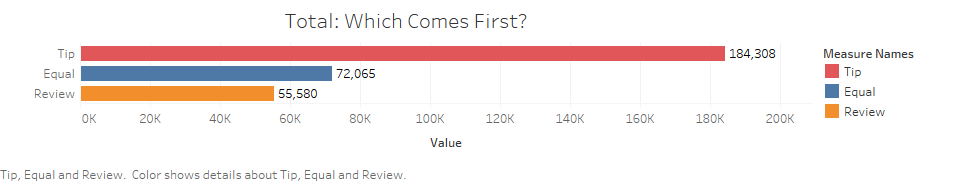

## Comparing Tip and Review  by State
We go now further into answering our question by adding the states. We want to compare the final result, which tip come first, and the results for each state.

* If date_average number is positive then it means Tip is EARLIER than Review
* If date_average number is negative then it means Tip is LATER   than Review

In [11]:
df_state = spark.sql(""" 
SELECT c.user_id, c.business_id, c.tip_date, c.review_date, c.date_diff, c.tip, c.equal, c.review, b.state
FROM comparedate AS C 
INNER JOIN yelp_business AS B
ON c.business_id = b.business_id
ORDER BY tip_date
""")

print "total: ", df_state.count() 
df_state.show(5, truncate=False)

df_state.createOrReplaceTempView("yelp_state")

total:  311953
+----------------------+----------------------+----------+-----------+---------+---+-----+------+-----+
|user_id               |business_id           |tip_date  |review_date|date_diff|tip|equal|review|state|
+----------------------+----------------------+----------+-----------+---------+---+-----+------+-----+
|g5QmiV9pO2xUBGkNMYzpvQ|J-dCfiKbf0irFtly8Q0ncQ|2009-04-16|2009-04-21 |5        |1  |0    |0     |AZ   |
|6en-a9f2a3zLkFsrazvyNA|6Li3eGHOHaqfR9E8oaI1yg|2009-04-16|2009-08-26 |132      |1  |0    |0     |ON   |
|U2sN2-HGvh27FyXKFlvkBg|YkHd_jANsjKWZu42xhkaKw|2009-04-16|2009-04-16 |0        |0  |1    |0     |AZ   |
|S1Am9rfV8pfdbAcA-UBKnQ|aqszoKRB4Ol9bpemt0_-GQ|2009-04-17|2009-06-01 |45       |1  |0    |0     |NC   |
|Rw4Q9-0JKZkBr5KUekWfkA|2p_ezP4nXCFJomM-VKS_bw|2009-04-18|2009-08-17 |121      |1  |0    |0     |AZ   |
+----------------------+----------------------+----------+-----------+---------+---+-----+------+-----+
only showing top 5 rows



## Category by State - Sum up the comparison result for Tip, Equal, and Review fields

Here we sum up our results categorized by States. There are a total of 37 states that has both Tips and Reviews written for a business in our Yelp data. The sum_tip, sum_equal, sum_review shows the distribution in each state. The last column date_average shows the average number of days Tips are written before Reviews.
We can see from the result that most states has Tips written before Reviews.

* If date_average number is positive then it means Tip is EARLIER than Review
* If date_average number is negative then it means Tip is LATER   than Review

In [14]:
df_sumstate = spark.sql(""" 
SELECT 
DISTINCT(state), SUM(tip) AS sum_tip, SUM(equal) AS sum_equal, SUM(review) AS sum_review,
ROUND(SUM(date_diff)/COUNT(date_diff)) AS date_average
FROM yelp_state
GROUP BY state
""")

print "total: ", df_sumstate.count() 
df_sumstate.show(40, truncate=False)
df_sumstate.createOrReplaceTempView("sumstate")

total:  37
+-----+-------+---------+----------+------------+
|state|sum_tip|sum_equal|sum_review|date_average|
+-----+-------+---------+----------+------------+
|AZ   |52400  |20035    |16291     |20.0        |
|SC   |305    |205      |100       |13.0        |
|BW   |295    |230      |108       |12.0        |
|ZET  |1      |0        |0         |4.0         |
|FAL  |0      |1        |0         |0.0         |
|01   |5      |1        |0         |103.0       |
|KHL  |1      |0        |0         |6.0         |
|NYK  |1      |3        |1         |-21.0       |
|NTH  |0      |1        |0         |0.0         |
|HLD  |21     |27       |4         |11.0        |
|SCB  |1      |0        |0         |1.0         |
|QC   |4740   |2394     |1314      |5.0         |
|ESX  |2      |1        |2         |15.0        |
|NV   |76761  |25387    |19436     |24.0        |
|GLG  |1      |0        |0         |167.0       |
|WI   |3021   |1137     |1124      |2.0         |
|75   |0      |0        |1         |-35

## Excel Graph
### Category by State - Tip or Review
We want to visualize our result for each state and observe the patterns and differences.
Showing 8 US States and 2 Canada States-
    US: AZ, IL, NC, NV, OH, PA, SC, WI
    Canada: ON, QC

### Category by State - Bar

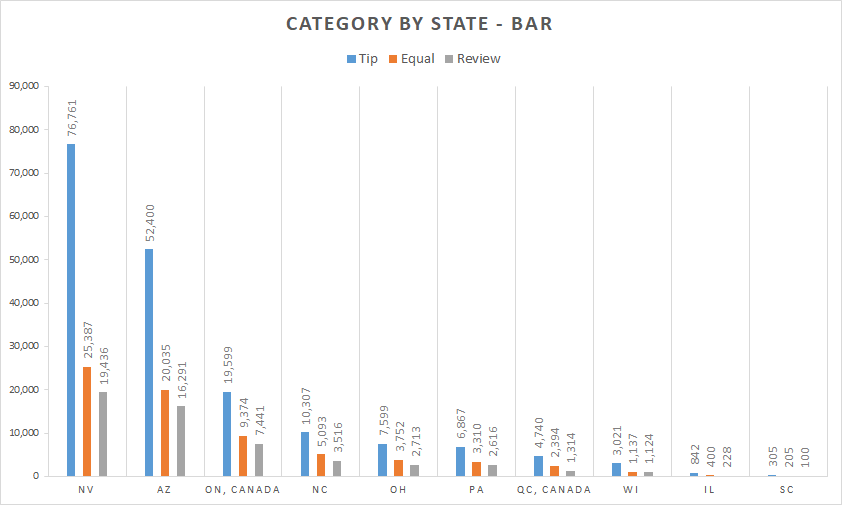

### Category by State - Stack Bar

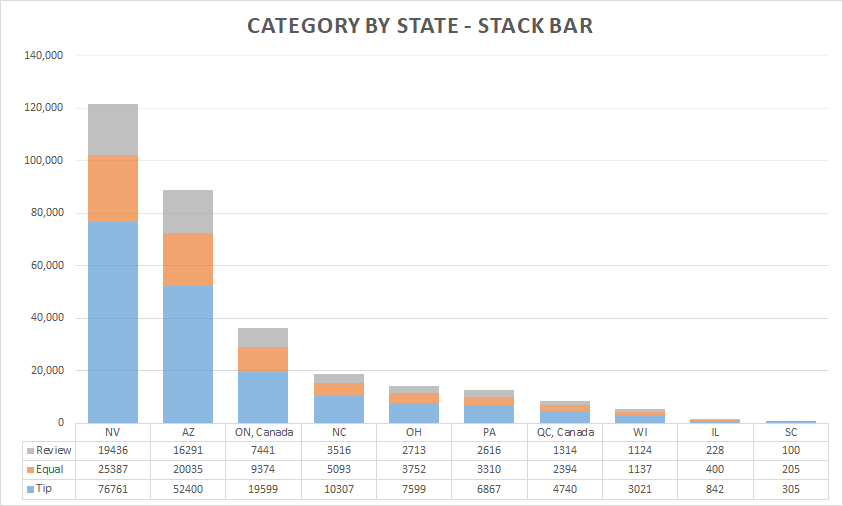

### Category by State - 100% Stacked Bar

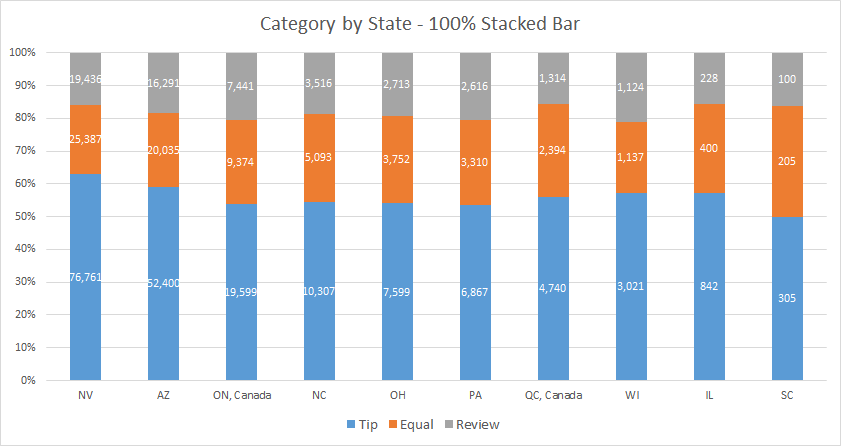

## Visualize the Date Average by States

Let's visualize the data average by each states.
* Positive numbers for Tip first
* Negative numbers for Review first

THe results shows that ON, Canada is the only State that has an average number with Review before Tip. All other States has the average of Tips before Reviews.

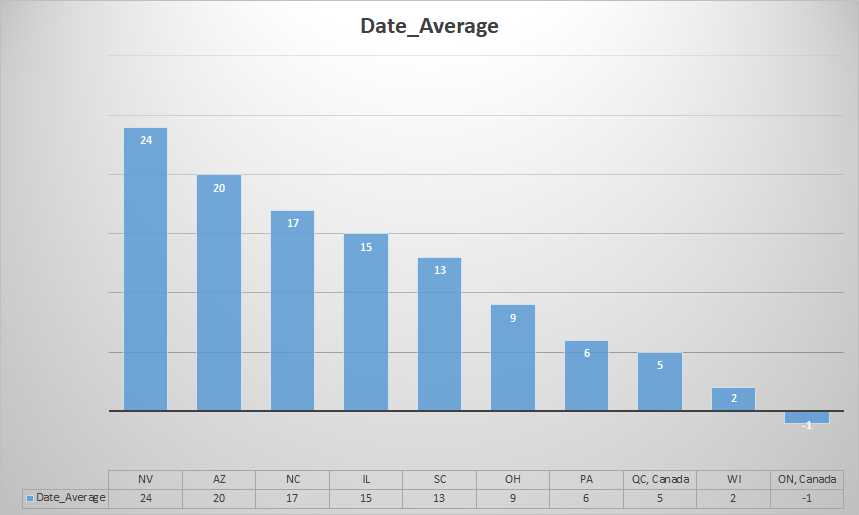

________________

## Conclusion

We can conclude that users generally write Tips before Reviews in Yelp. Our total general distribution as well as category by State show a moajority of Tips are written before Reviews. The average number of days Tips are written before Reviews is 17 days. The distribution is: Tips - 59%, Equal(same day) - 23%, and Review - 18% 